# Caminhada Aleatória em ${Z}^2$

## Introdução e Objetivos

Este projeto tem como ponto de partida a Caminhada Aleatória em ${Z}^2$, um dos pilares fundamentais da Teoria das Probabilidades. Sua relevância é tamanha que o tema constitui o núcleo da disciplina de Processos Estocásticos, servindo de base para o estudo de conceitos conexos como Cadeias de Markov e Percolação. Além de sua importância teórica, a caminhada aleatória atua como um modelo robusto para descrever diversos fenômenos reais, desde o movimento browniano de partículas em suspensão num fluido até a dinâmica estocástica de preços no mercado financeiro.

Neste trabalho, analisaremos especificamente a caminhada aleatória simples e simétrica na grade bidimensional (${Z}^2$). Para fundamentar a análise, é necessário trazer a definição de uma caminhada aleatória simétrica:

- Processo que ocorre quando a probabilidade de transição para qualquer um dos vizinhos imediatos é idêntica. No caso bidimensional, isso significa que a partícula tem probabilidade $p = 1/4$ de se mover para cima, baixo, esquerda ou direita a cada passo, ou seja, um dos sesu quatro vizinhos no plano.

As questões centrais a serem investigadas neste projeto são:

- **Recorrência**: A caminhada é recorrente, ou seja, ela sempre retorna à sua origem?
- **Alcance**: Quão longe, em média, o caminhante se afasta de seu ponto de partida ao longo do tempo?
- **Cobertura**: Quanto tempo leva para explorar completamente uma região finita do espaço?

## Modelo Gerador

O modelo é a trajetória de uma partícula em uma grade de inteiros bidimensional.
Seja $X_t = (x_t, y_t) \in \mathbb{Z}^2$ a posição do caminhante no tempo $t$.

A caminhada começa na origem:
$$X_0 = (0, 0)$$

Em cada passo de tempo $t$, a partícula se move para um de seus quatro vizinhos mais próximos com igual probabilidade. A transição é dada por:
$$X_{t+1} = X_t + \delta_t$$

Onde $\delta_t$ é uma variável aleatória escolhida uniformemente (com probabilidade $P(\delta_t) = 1/4$) do conjunto de passos $\mathcal{S}$:
$$\mathcal{S} = \{(1, 0), (-1, 0), (0, 1), (0, -1)\}$$

Cada passo $\delta_t$ é independente dos anteriores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(54)

No bloco acima, temos todos os pacotes usados para o trabalho. Iremos usar semente fixa pra reprodutibilidade.

In [2]:
### Implementando o Modelo Gerador ##

# Função que inicia no ponto de origem, no tempo 0 e há uma variável para registrar o caminho

def modelo_gerador(tempo):
  x = np.array([0,0])
  t= 0
  trajetoria = [[0,0]]

  # O próximo movimento será calculado atrvés da fórmula: x_t = x + delta
  # Delta é uma variável aleatória escolhida uniformemente do conjunto de passos que significam,
  # respectivamente, "+1 passo para cima", "+1 passo à esquerda", "+1 passo à direita" e "+1 passo para baixo".

  delta = np.array([[1,0],[-1,0],[0,1],[0,-1]])

  for i in range(tempo):

    # A decisão de qual vizinho visitar será feita através da Uniforme (0,1)
    valor = np.random.uniform(0, 1)

    if valor < 0.25:
      x = x + delta[0]
    elif valor < 0.5:
      x = x + delta[1]
    elif valor < 0.75:
      x = x + delta[2]
    else:
      x = x + delta[3]
    t = t + 1
    trajetoria.append(x.copy())
  return np.array(trajetoria)

Neste bloco, implementamos o modelo gerador da Caminhada Aleatória Simples. A função recebe como parâmetro o `tempo` da caminhada, ou seja, o número total de passos que a partícula percorrerá.

Para definir a direção de cada passo, utilizamos uma distribuição Uniforme(0,1). Visto que os quatro vizinhos possuem igual probabilidade de escolha, o intervalo [0, 1] foi dividido em quatro partes iguais para determinar o movimento. A cada iteração, a nova posição é registrada na variável `trajetoria`. Ao final, a função retorna esse histórico completo contendo todas as posições visitadas pela partícula.

## Metodologia de Simulação

### Simulação de Trajetórias

A simulação consiste em gerar iterativamente uma sequência de posições $X_0, X_1, \dots, X_T$ para um número total de passos $T$.

[[ 0  0]
 [-1  0]
 [-2  0]
 [-1  0]
 [-1  1]
 [ 0  1]
 [ 0  0]
 [ 0 -1]
 [ 0 -2]
 [ 0 -1]
 [ 1 -1]
 [ 0 -1]
 [-1 -1]
 [ 0 -1]
 [ 0 -2]
 [ 0 -1]
 [ 0 -2]
 [-1 -2]
 [-2 -2]
 [-2 -1]
 [-2 -2]
 [-3 -2]
 [-2 -2]
 [-1 -2]
 [ 0 -2]
 [ 0 -1]
 [-1 -1]
 [-2 -1]
 [-1 -1]
 [-1 -2]
 [-2 -2]
 [-1 -2]
 [-1 -3]
 [ 0 -3]
 [ 0 -2]
 [ 0 -3]
 [-1 -3]
 [-2 -3]
 [-3 -3]
 [-2 -3]
 [-3 -3]
 [-2 -3]
 [-1 -3]
 [ 0 -3]
 [ 1 -3]
 [ 1 -4]
 [ 1 -3]
 [ 1 -2]
 [ 1 -3]
 [ 1 -4]
 [ 2 -4]
 [ 2 -5]
 [ 3 -5]
 [ 3 -6]
 [ 3 -5]
 [ 3 -6]
 [ 3 -5]
 [ 4 -5]
 [ 4 -4]
 [ 4 -3]
 [ 3 -3]
 [ 3 -2]
 [ 3 -3]
 [ 4 -3]
 [ 5 -3]
 [ 6 -3]
 [ 6 -4]
 [ 6 -5]
 [ 7 -5]
 [ 8 -5]
 [ 8 -6]
 [ 8 -7]
 [ 8 -8]
 [ 7 -8]
 [ 6 -8]
 [ 6 -7]
 [ 7 -7]
 [ 7 -6]
 [ 6 -6]
 [ 6 -7]
 [ 6 -6]
 [ 7 -6]
 [ 6 -6]
 [ 5 -6]
 [ 4 -6]
 [ 5 -6]
 [ 6 -6]
 [ 7 -6]
 [ 8 -6]
 [ 9 -6]
 [ 9 -5]
 [ 9 -4]
 [ 9 -5]
 [ 8 -5]
 [ 7 -5]
 [ 7 -6]
 [ 7 -5]
 [ 8 -5]
 [ 7 -5]
 [ 6 -5]
 [ 7 -5]]


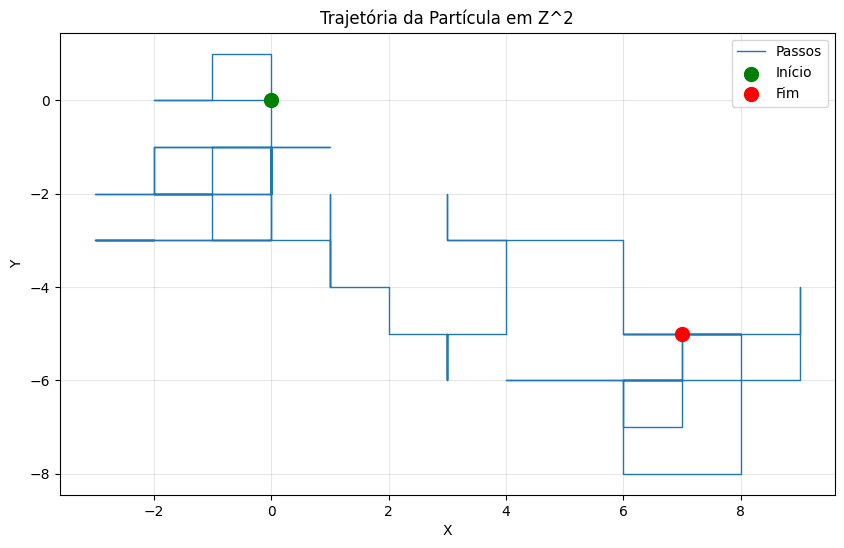

In [3]:
### Simulação de Tragetórias ##

# Simulando uma caminhada com tempo t = 100
teste = modelo_gerador(100)

# Trajetória
print(teste)

# Gráfico
x_coords = teste[:, 0]
y_coords = teste[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(x_coords, y_coords, linewidth=1, label='Passos')

plt.scatter(x_coords[0], y_coords[0], c='green', s=100, zorder=5, label='Início')
plt.scatter(x_coords[-1], y_coords[-1], c='red', s=100, zorder=5, label='Fim')

plt.title("Trajetória da Partícula em Z^2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Neste bloco, apresentamos um exemplo de aplicação do modelo gerador para uma caminhada com duração de 100 passos.

Conforme mencionado anteriormente, o algoritmo retorna a trajetória completa da partícula, o que pode ser verificado graficamente.

### Probabilidade de Retorno

Para estimar a probabilidade de retorno à origem no passo $2n$, $P(X_{2n} = (0,0))$, um grande número de caminhadas de comprimento $2n$ deve ser simulado. A estimativa é a fração de caminhadas que terminam na origem $(0, 0)$.

In [4]:
def prob_retorno(n_valores, M, multiplicador=2):
    # Aplica o multiplicador aos valores de n
    n_ajustados = [multiplicador * n for n in n_valores]

    probs = []

    for n in n_ajustados:
        sucessos = 0
        for _ in range(M):
            pos = modelo_gerador(n)
            if pos[-1][0] == 0 and pos[-1][1] == 0:
                sucessos += 1
        probs.append(sucessos / M)

    return n_ajustados, probs

Investigação sobre o comportamento de uma caminhada aleatória em $\mathbb{Z}^2$: para estimar a probabilidade de retorno á origem em *n* passos, implementamos uma função que recebe uma lista de valores (*n* passos), o números de simulações ($M$) e um multiplicador. A lista é ajustada em (*n*⋅multiplicador) e cada um desses ajustes é executado $M$ simulações independentes chamando o modelo gerador que simula a trajetória de uma partícula que parte da origem (0,0) e se move nas quatro direções mais próximas (cima, baixo, esquerda, direita) e a cada simulação é verificado se a posição final corresponde com a origem (0,0). Com essa frequência de retorno das $M$ simulações temos a estimativa de Monte Carlo da probablidade de retorno.

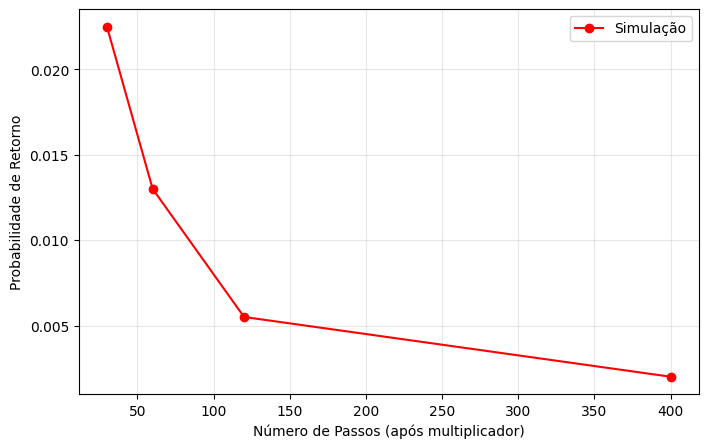

In [5]:
# Uso do código generalizado

n_valores = [15, 30, 60, 200]   #escolhe qualquer lista
M = 2000
multiplicador = 2              #escolhe qualquer multiplicador (2n, 3n, n...)

n_ajustados, probs = prob_retorno(n_valores, M, multiplicador)

plt.figure(figsize=(8, 5))
plt.plot(n_ajustados, probs, 'ro-', label='Simulação')
plt.xlabel('Número de Passos (após multiplicador)')
plt.ylabel('Probabilidade de Retorno')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

No gráfico de Decaimento, analisamos a probabilidade de retorno $P(X_{2n} = (0,0))$ em função do tempo. Observa-se que a probabilidade diminui conforme o número de passos aumenta. No entanto, a curva não toca o zero, ou seja, a soma das probabilidades tende ao infinito. Portanto, concluímos que o número esperado de visitas à origem é infinito, e, assim, a caminhada aleatória simples e simétrica na grade bidimensional ($\mathbb{Z}^2$) é recorrente.

### Raio Quadrático Médio
Para uma única trajetória, o raio quadrático no tempo $t$ é $R^2(t) = \|X_t - X_0\|^2$.

O Deslocamento Quadrático Médio (MSD), $\langle R^2(t) \rangle$, é a média desta quantidade sobre muitas trajetórias independentes.

In [6]:
### Erro Quadrático Médio ###

# O cáclulo do raio quadrático para uma partícula é através da fórmula: R^2(t) = [(x_t,y_t) - (x_0,y_0)]^2
# Logo, o raio quadrático médio será a média entre as normas de cada partícula
# m = n° de partículas
# t = tempo

def raio_quadratico_medio(m, t):

  raios = []

  for i in range(m):
    caminho = modelo_gerador(t)
    norma= caminho[:, 0]**2 + caminho[:, 1]**2

    # Soma ao acumulador geral
    raios.append(norma.copy())

  # Calculando o MSD
  msd = np.mean(raios, axis=0)

  return msd

Nesta parte específica, encontramos dificuldade em processar a saída em tempo hábil. Para um número elevado de passos, o código original entrava em um ciclo de processamento que levaria mais de 15 minutos para concluir.

A solução encontrada foi utilizar um array para acumular as distâncias de forma otimizada. Dentro do loop das partículas (ex: 10 mil), o algoritmo agora gera a trajetória completa de cada uma e calcula o quadrado da distância para todos os instantes de uma única vez.

Ao final, armazenamos esses vetores na lista `raios`, formando uma matriz de dimensões $m*(t+1)$. A aplicação da função `np.mean` com `axis=0` permite obter a média entre as diferentes partículas a cada passo, preservando a evolução temporal do MSD, que viria a ser requisitado posteriormente.

### Tempo de Cobertura
Para medir o tempo necessário para visitar todas as células de um quadrado $k \times k$ centrado na origem, a simulação deve manter um registro de todos os sítios visitados.

A simulação para quando todos os $k^2$ sítios foram visitados, e o número de passos é registrado como o tempo de cobertura.

In [7]:
### Tempo de Cobertura ###

def tempo_cobertura_uma_trajetoria(quadrado, max_passos, rng):

    x, y = 0, 0
    visitados = set()
    if (0, 0) in quadrado:
        visitados.add((0, 0))

    direcoes = ((1, 0), (-1, 0), (0, 1), (0, -1))
    t = 0
    n_alvo = len(quadrado)

    while len(visitados) < n_alvo:
        t += 1
        if (max_passos is not None) and (t >= max_passos):
            return None

        j = rng.integers(4)
        dx, dy = direcoes[j]
        x += dx
        y += dy

        p = (x, y)
        if p in quadrado:
            visitados.add(p)

    return t

def tempo_cobertura(quadrado, m, max_passos, rng):

    resultados = []
    falhas = 0

    for _ in range(m):
        t = tempo_cobertura_uma_trajetoria(quadrado, max_passos=max_passos, rng=rng)
        if t is None:
            falhas += 1
        else:
            resultados.append(t)

    return resultados, falhas

## Plano de Experimentos e Métricas

### Questão 1 - Retorno à Origem
Estime $P(X_{2n} = (0,0))$ para $n \in \{10, 20, 50, 100\}$.

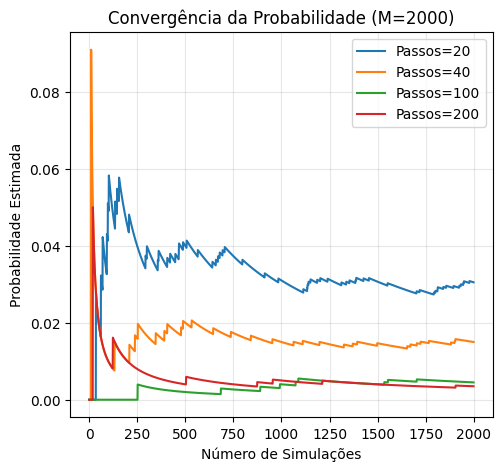

In [8]:
n_valores = [20, 40, 100, 200]
M = 2000

plt.figure(figsize=(12, 5))

probs_finais = []
plt.subplot(1, 2, 1)

for n in n_valores:
    sucessos_acumulados = 0
    historico_prob = []

    for i in range(1, M + 1):
            caminho_completo = modelo_gerador(n)

            ultimo_x = caminho_completo[-1, 0]
            ultimo_y = caminho_completo[-1, 1]

            if ultimo_x == 0 and ultimo_y == 0:
                sucessos_acumulados += 1

            historico_prob.append(sucessos_acumulados / i)

    probs_finais.append(historico_prob[-1])

    plt.plot(historico_prob, label=f'Passos={n}')

plt.title(f'Convergência da Probabilidade (M={M})')
plt.xlabel('Número de Simulações')
plt.ylabel('Probabilidade Estimada')
plt.legend()
plt.grid(True, alpha=0.3)

Pode-se observar que a estimativa da probabilidade de retorno se estabiliza conforme aumenta o número de simulações. No início, as curvas oscilam bastante porque existem poucas observações, mas conforme o número de simulações cresce, a estimativa se estabiliza, isso é a convergência do método de Monte Carlo.
Para maiores valores de $n$, a curva leva mais tempo para se estabilizar porque o retorno à origem é um evento raro e precisaria de mais simulações para ter uma boa estimativa.

### Questão 2 - Alcance
Simule $M = 1000$ trajetórias de até $T = 10000$ passos. Calcule e plote o raio quadrático médio $\langle R^2(t) \rangle$ em função do tempo $t$.

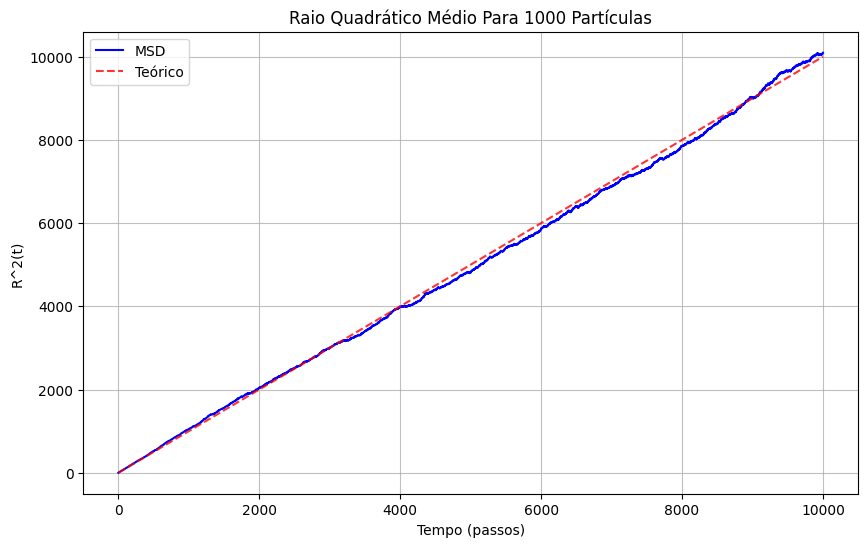

In [9]:
m = 1000
t = 10000
guarda = raio_quadratico_medio(m,t)

# Gráfico
plt.figure(figsize=(10, 6))
tempo_x = np.arange(t+1)
plt.plot(tempo_x, guarda, label='MSD', color='blue', linewidth=1.5)
plt.plot(tempo_x, tempo_x, label='Teórico', color='red', linestyle='--', alpha=0.8)
plt.title('Raio Quadrático Médio Para 1000 Partículas')
plt.xlabel('Tempo (passos)')
plt.ylabel('R^2(t)')
plt.grid(True, alpha=0.8)
plt.legend()
plt.show()

Aqui temos uma aplicação prática da função criada para calcular o Raio Quadrático Médio da caminhada aleatória. Após simularmos o movimento de mil partículas por 10 mil passos cada, notamos, através da linha azul, que a média de afastamento da origem aumenta à medida que o tempo avança.

Observa-se também a importância do número de partículas. Pela Lei dos Grandes Números, quanto maior o número de trajetórias simuladas, mais a média empírica converge para a esperança teórica. Se tivéssemos simulado apenas 10 ou 50 partículas, a linha azul apresentaria fortes flutuações, dificultando a visualização da tendência linear.

### Questão 3 - Tempo de cobertura
Para quadrados de lado k ∈ {3, 5, 7}, estime a distribuição do tempo de cobertura simulando o processo até a cobertura total em M = 500 réplicas para cada k.

In [10]:
def gerar_pontos_quadrado(k):
    alvo = set()
    limite = k // 2
    for x in range(-limite, limite + 1):
        for y in range(-limite, limite + 1):
            alvo.add((x, y))  # x e y já são int
    return alvo

Formação do quadrado de interesse: para o *k* dado ele forma um conjunto de pontos de um quadrado centrado na origem. O "alvo" é usado para representar todos os pontos que precisam ser visitados durante a caminhada.


Iniciando k=3...
Concluído k=3 | 179/500 cobriram | falhas: 321 | Média de passos: 7825.28

Iniciando k=5...
Concluído k=5 | 95/500 cobriram | falhas: 405 | Média de passos: 15891.71

Iniciando k=7...
Concluído k=7 | 41/500 cobriram | falhas: 459 | Média de passos: 34654.34


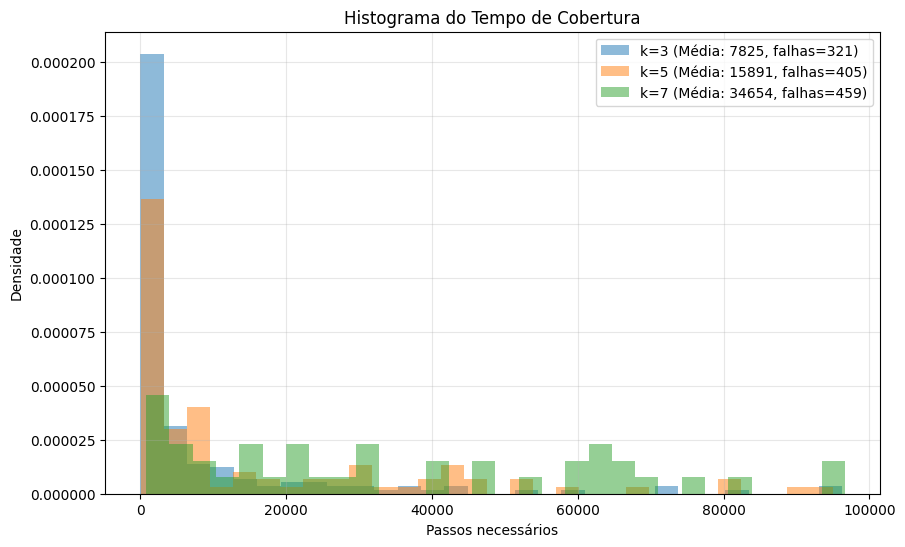

In [11]:
def tempo_cobertura_uma_trajetoria(quadrado, max_passos, rng):

    x, y = 0, 0
    visitados = set()
    if (0, 0) in quadrado:
        visitados.add((0, 0))

    direcoes = ((1, 0), (-1, 0), (0, 1), (0, -1))
    t = 0
    n_alvo = len(quadrado)

    while len(visitados) < n_alvo:
        t += 1
        if (max_passos is not None) and (t >= max_passos):
            return None

        j = rng.integers(4)
        dx, dy = direcoes[j]
        x += dx
        y += dy

        p = (x, y)
        if p in quadrado:
            visitados.add(p)

    return t

def tempo_cobertura(quadrado, m, max_passos, rng):

    resultados = []
    falhas = 0

    for _ in range(m):
        t = tempo_cobertura_uma_trajetoria(quadrado, max_passos=max_passos, rng=rng)
        if t is None:
            falhas += 1
        else:
            resultados.append(t)

    return resultados, falhas

# Aplicação

k_lista = [3, 5, 7]
M = 500
MAX_PASSOS = 100000

rng = np.random.default_rng()

plt.figure(figsize=(10, 6))

for k in k_lista:
    print(f"\nIniciando k={k}...")
    quadrado = gerar_pontos_quadrado(k)
    tempos, falhas = tempo_cobertura(quadrado, M, max_passos=MAX_PASSOS, rng=rng)

    if len(tempos) > 0:
        media = np.mean(tempos)
        plt.hist(
            tempos,
            bins=30,
            alpha=0.5,
            label=f'k={k} (Média: {int(media)}, falhas={falhas})',
            density=True
        )
        print(f"Concluído k={k} | {len(tempos)}/{M} cobriram | "
              f"falhas: {falhas} | Média de passos: {media:.2f}")
    else:
        print(f"Nenhuma trajetória cobriu o quadrado para k={k}.")

plt.title('Histograma do Tempo de Cobertura')
plt.xlabel('Passos necessários')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

O código implementa uma simulação para estudar o tempo de cobertura de uma caminhada simples em $\mathbb{Z}^2$. Para cada valor de *k* é considerado um conjunto de pontos de um quadrado centrado na origem e simula-se o tempo que leva para que a caminhada visite todos os pontos, além de verificar as falhas, ou seja, as trajetórias que não conseguiram cobrir o quadrado dentro no número máximo de passos. Fazendo essa repetição $M$  vezes, tem-se uma amostra dos tempos de coberturas, que são usados na construção de histogramas e calculos das médias.